In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS



from collections import Counter

#read data
df = pd.read_csv('Data/netflix_titles.csv')

In [3]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
#count rows and columns
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(7787, 12)
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
['release_year']
['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'rating' 'duration' 'listed_in' 'description']


In [5]:
df.drop(['director','cast','description'], axis = 1, inplace=True)

In [6]:
# % of missing data in each column.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

show_id - 0%
type - 0%
title - 0%
country - 7%
date_added - 0%
release_year - 0%
rating - 0%
duration - 0%
listed_in - 0%


In [7]:
df.isna().sum()

show_id           0
type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
dtype: int64

In [8]:
#Replace empty null values with N/A
df["country"].fillna("N/A", inplace = True) 
#drop rows will null in date added and rating - only 17 rows total so little effect on data analysis results.
df.dropna(subset=["date_added"],inplace = True)
df.dropna(subset=["rating"],inplace = True)

In [9]:
#check null values have been replaced with pandas standard NaN
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
#check for duplicate records
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7770, dtype: bool

In [11]:

# Split and add year and months into dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df.head()

show_id     type  title        country date_added  release_year rating  \
0      s1  TV Show     3%         Brazil 2020-08-14          2020  TV-MA   
1      s2    Movie   7:19         Mexico 2016-12-23          2016  TV-MA   
2      s3    Movie  23:59      Singapore 2018-12-20          2011      R   
3      s4    Movie      9  United States 2017-11-16          2009  PG-13   
4      s5    Movie     21  United States 2020-01-01          2008  PG-13   

    duration                                          listed_in  year_added  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...        2020   
1     93 min                       Dramas, International Movies        2016   
2     78 min                Horror Movies, International Movies        2018   
3     80 min  Action & Adventure, Independent Movies, Sci-Fi...        2017   
4    123 min                                             Dramas        2020   

   month_added  
0            8  
1           12  
2           12  
3           11  
4            1

In [12]:
#print duplicate rows - large dataset cannot be displayed as above
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [show_id, type, title, country, date_added, release_year, rating, duration, listed_in, year_added, month_added]
Index: []


In [13]:
#DESCRIPTIVE STATISTICS


#country
stats_numeric = df['country'].describe()
print (stats_numeric)
print()

#year_added
stats_numeric2 = df['year_added'].describe().astype (int)
print (stats_numeric2)
print()

#release_year
stats_numeric3 = df['release_year'].describe().astype (int)
print (stats_numeric3)
print()

#month_added
stats_numeric4 = df['month_added'].describe()
print (stats_numeric4)
print()

#Ratings
stats_numeric5 = df['rating'].describe()
print (stats_numeric5)
print()

#duration
stats_numeric6 = df['duration'].describe()
print (stats_numeric6)
print()

#Type
stats_numeric7 = df['type'].describe()
print (stats_numeric7)
print()

count              7770
unique              682
top       United States
freq               2546
Name: country, dtype: object

count    7770
mean     2018
std         1
min      2008
25%      2018
50%      2019
75%      2020
max      2021
Name: year_added, dtype: int32

count    7770
mean     2013
std         8
min      1925
25%      2013
50%      2017
75%      2018
max      2021
Name: release_year, dtype: int32

count    7770.000000
mean        6.784942
std         3.591219
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: month_added, dtype: float64

count      7770
unique       14
top       TV-MA
freq       2861
Name: rating, dtype: object

count         7770
unique         216
top       1 Season
freq          1606
Name: duration, dtype: object

count      7770
unique        2
top       Movie
freq       5372
Name: type, dtype: object



In [14]:
#Analysis by Type of Content 

([<matplotlib.patches.Wedge at 0x29881ba6850>,
 [Text(0.6222219335963194, 0.9071052118424067, 'Movie'),
  Text(-0.6222219335963198, -0.9071052118424064, 'TV Show')],
 [Text(0.3393937819616287, 0.49478466100494906, '30.86%'),
  Text(-0.339393781961629, -0.4947846610049489, '69.14%')])

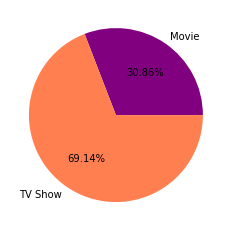

In [15]:
#Count of Tv Shows vs Movies - What content is more prevalent?

plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,
        autopct='%1.2f%%',colors=['Purple','Coral'])





In [16]:
#Count of content in each country

country = df['country']
country_count = pd.Series(dict(Counter(','.join(country).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)

country_count

United States     3288
India              990
United Kingdom     722
N/A                505
Canada             412
                  ... 
Azerbaijan           1
Bermuda              1
Ecuador              1
Mongolia             1
Montenegro           1
Length: 119, dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Country')

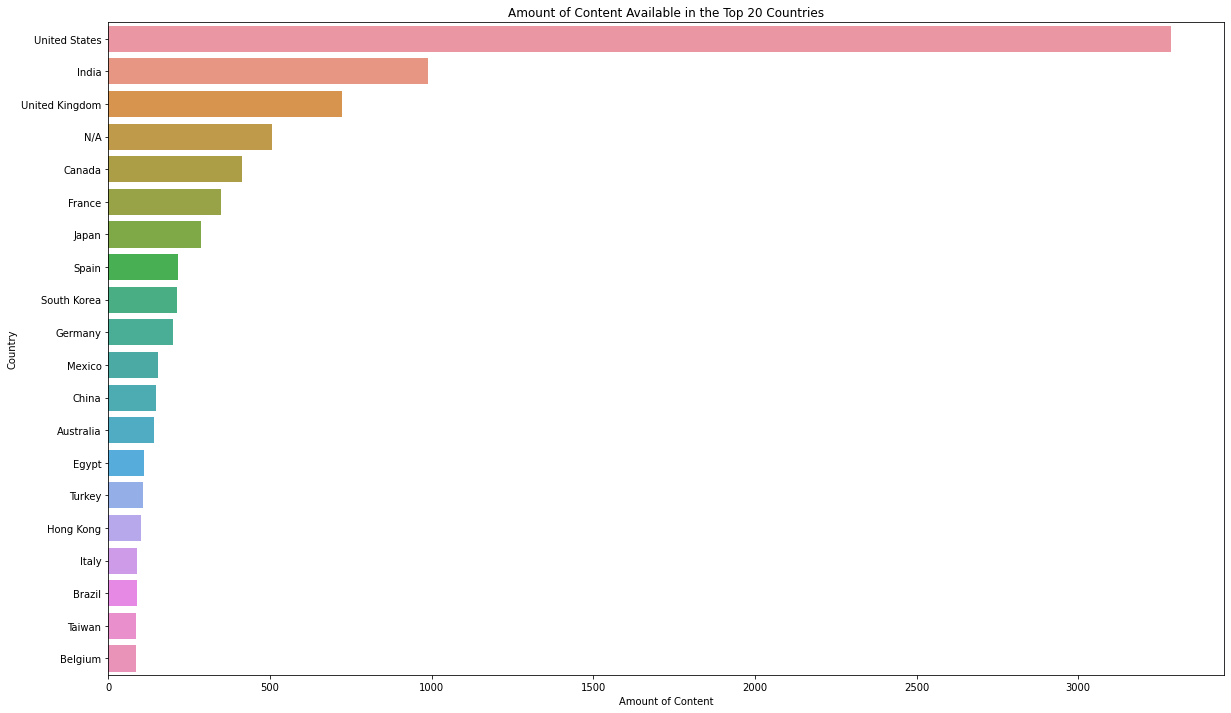

In [17]:
#content available in different countries


country_top = country_count[:20]
plt.figure(figsize=(20,12))
z = sns.barplot(country_top, country_top.index)


z.set_title('Amount of Content Available in the Top 20 Countries')
z.set_xlabel('Amount of Content')
z.set_ylabel('Country')




Text(0, 0.5, 'Amount of Content')

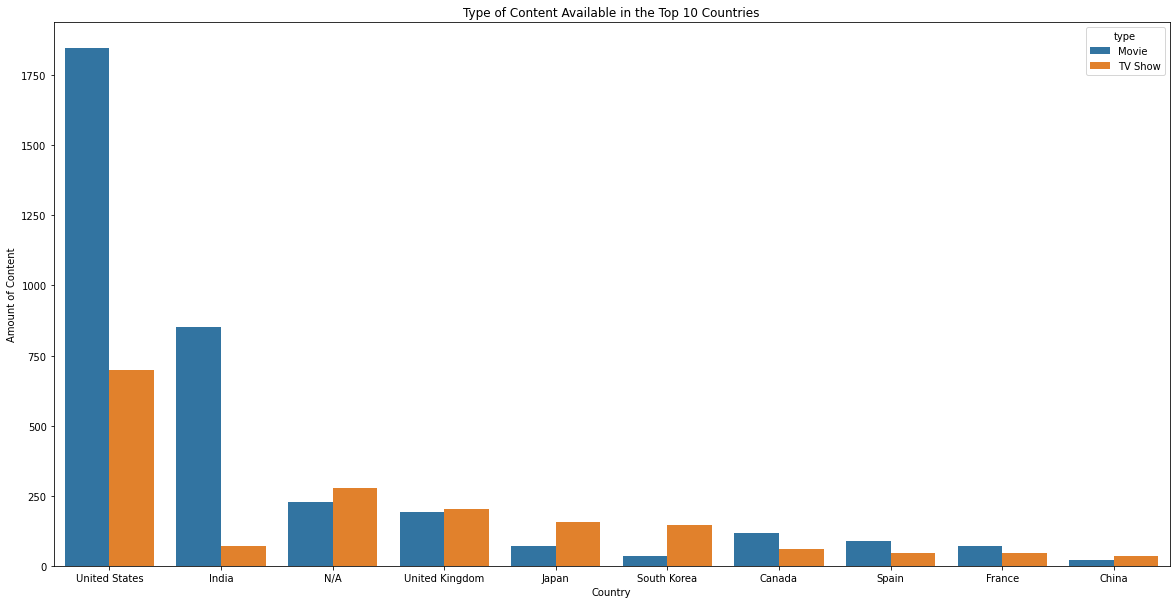

In [18]:
#Popularity of content type per country


plt.figure(figsize=(20,10))

#Frequency of type of contengt for top 20 countries
x = sns.countplot(x='country',hue='type',data=df[df.country.isin(['United States','India','United Kingdom','N/A','Canada','France','Japan','Spain','South Korea','German,''Mexico','China'])])

#titles
x.set_title('Type of Content Available in the Top 10 Countries')
x.set_xlabel('Country')
x.set_ylabel('Amount of Content')

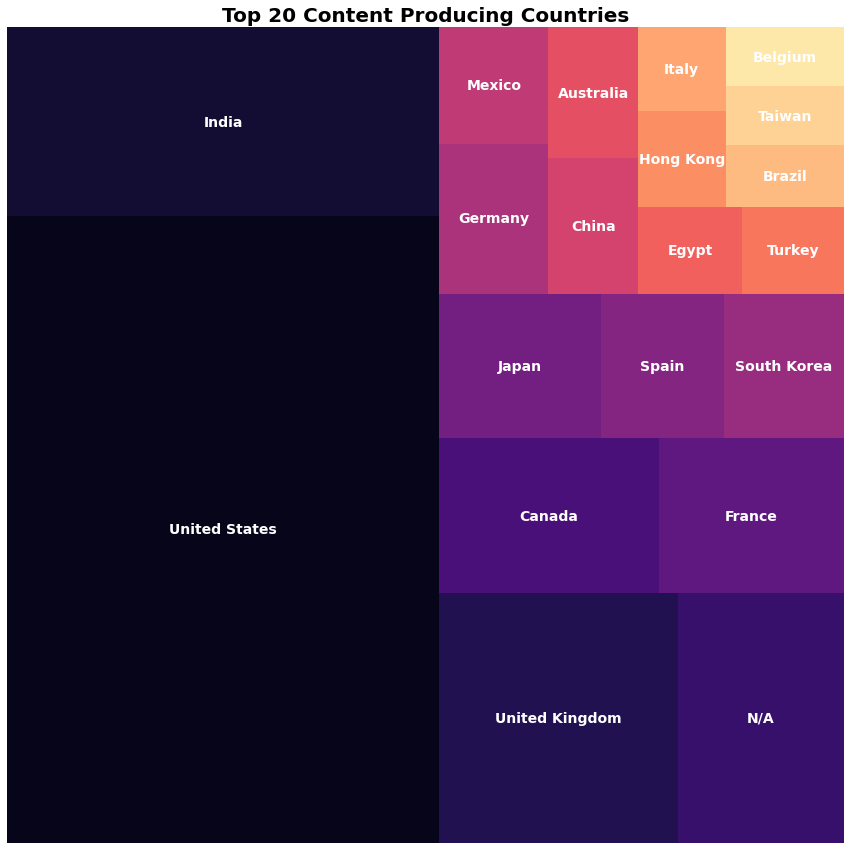

In [19]:
import squarify

y = country_top
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("magma", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold', 'color' : 'white'})
plt.title('Top 20 Content Producing Countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')

plt.axis('off')
plt.show()

In [20]:
d_type_yr = df.groupby(['type', 'year_added']).count().reset_index()

px.bar(d_type_yr, x= 'year_added' , y='show_id', color = 'type', barmode = 'group', range_x = [2010,2021], labels={
                     "year_added": "Year Added",
                     "show_id": "Frequency"
                     
                 },
                title="Content Added to Netflix since 2010")

In [21]:
#Counting type vs release year = from 1925
d_typey = df.groupby(['type', 'release_year']).count().reset_index()
#Content added by release year
px.bar(d_typey, x= 'release_year' , y='show_id', color = 'type', barmode = 'group', range_x = [1925,2021], labels={
                     "release_year": "Release Year",
                     "show_id": "Frequency of Content"
                     
                 },
                title="Frequency of Content by Original Release Year")



In [22]:
#Counting type vs release year = 1990 - 
d_typey = df.groupby(['type', 'release_year']).count().reset_index()
#Content added by release year
px.bar(d_typey, x= 'release_year' , y='show_id', color = 'type', barmode = 'group', range_x = [1925,2021], labels={
                     "release_year": "Release Year",
                     "show_id": "Frequency of Content"
                     
                 },
                title="Frequency of Content by Original Release Year")

Text(0, 0.5, 'Content Added')

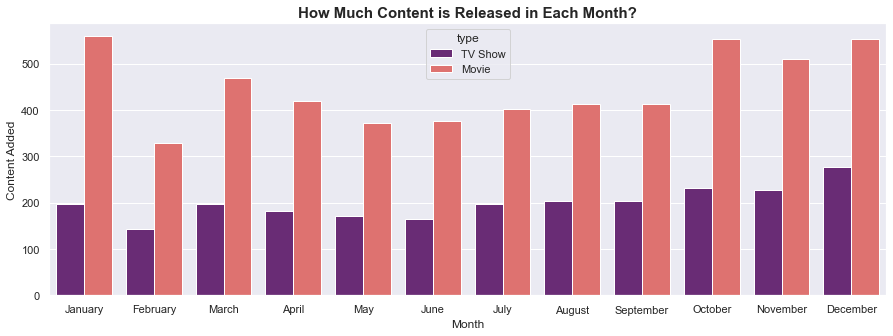

In [23]:
df['month_name_added']=df['date_added'].dt.month_name()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="month_name_added", hue = 'type', data=df, palette="magma",
                   order = ["January","February","March","April","May","June",
                            "July","August","September", "October", "November", "December"])

#titles
ax.set_title('How Much Content is Released in Each Month?', fontsize=15, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Content Added')

In [24]:
#Genre Analysis

In [25]:
#Splitting and Count of genres
from collections import Counter
genre = df['listed_in']
genre_count = pd.Series(dict(Counter(','.join(genre).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)

genre_count

International Movies            2437
Dramas                          2105
Comedies                        1471
International TV Shows          1197
Documentaries                    786
Action & Adventure               721
TV Dramas                        703
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      517
Thrillers                        491
Crime TV Shows                   426
Kids' TV                         411
Docuseries                       352
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 231
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
Korean TV Shows                  150
TV Action & Adventure            149
Spanish-Language TV Shows        146
Anime Series                     146
C

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Genre')

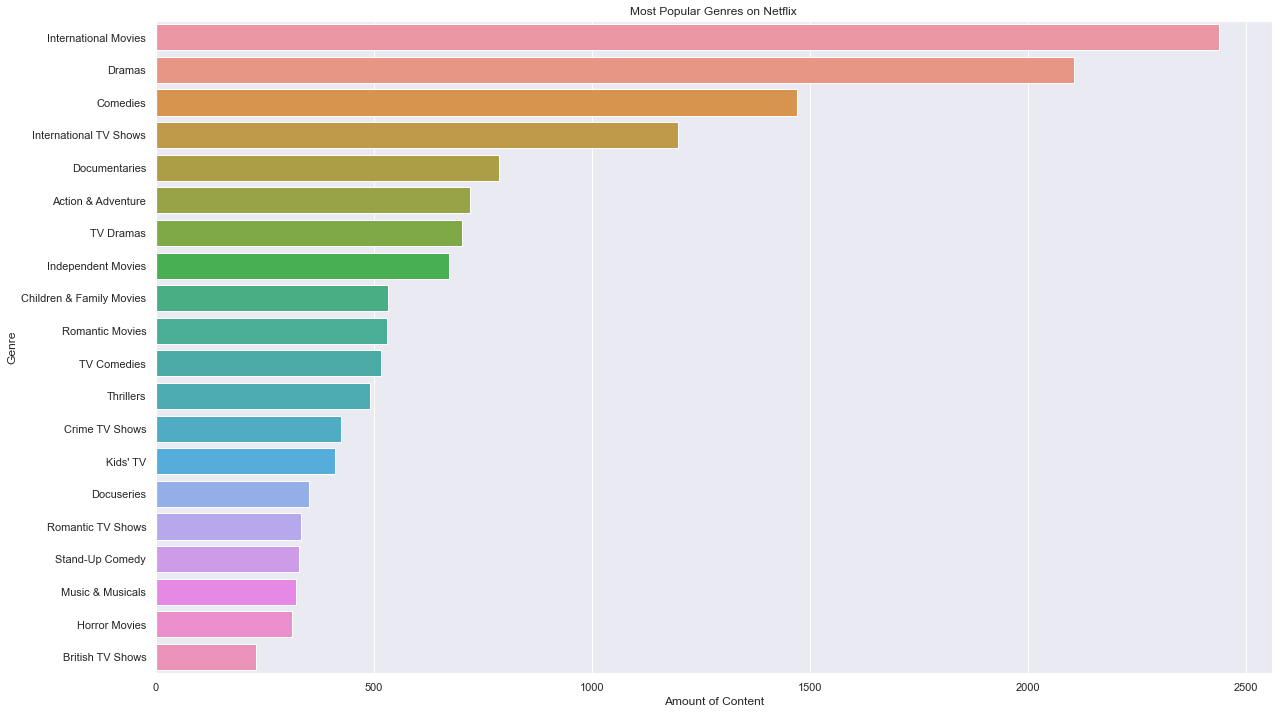

In [26]:
#visualised genres



genre_top = genre_count[:20]
plt.figure(figsize=(20,12))
a = sns.barplot(genre_top, genre_top.index)

a.set_title('Most Popular Genres on Netflix')
a.set_xlabel('Amount of Content')
a.set_ylabel('Genre')




C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



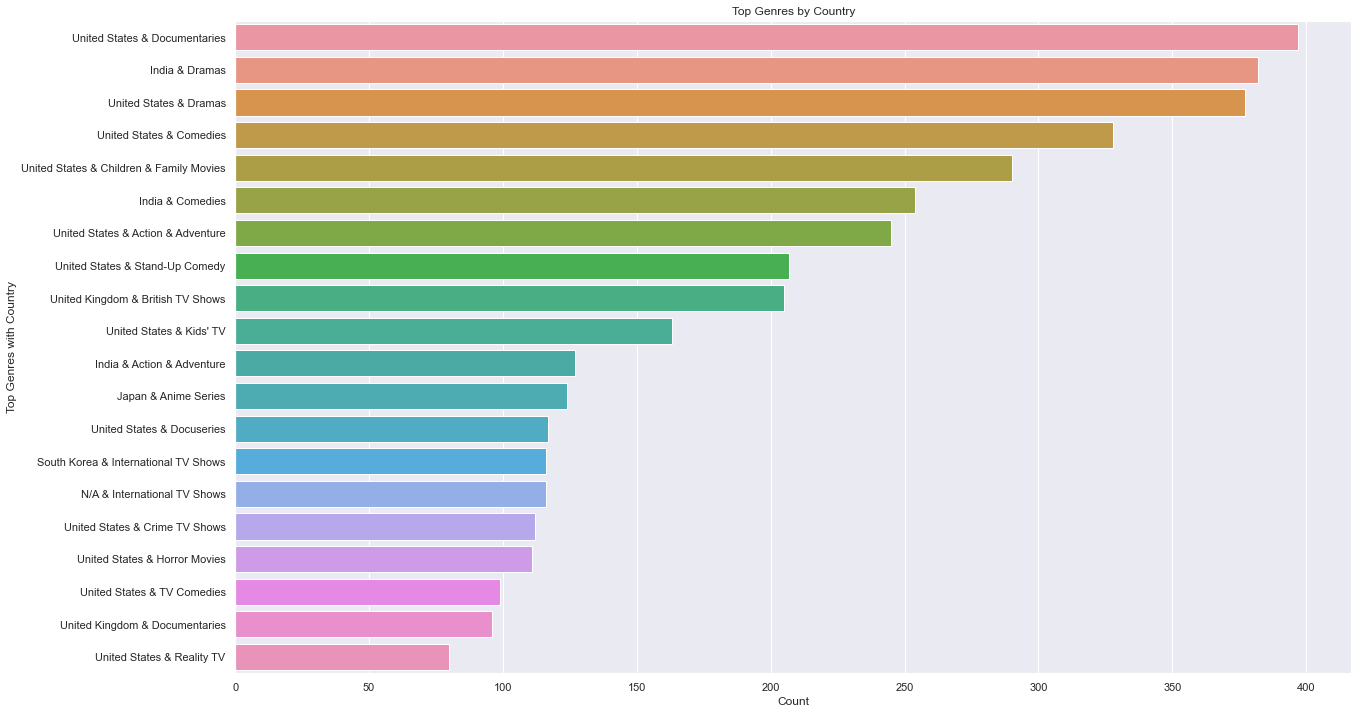

In [27]:
#Top genre for each country

#Split multi-cell data and concantenate genre and country columns
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

#print country & genre on y axis
df['genre_country'] = df['primary_country'] + ' & ' + df['genre']



#Split country column with multiple data per cell
df_c = df['genre_country']
df_count = pd.Series(dict(Counter(','.join(df_c).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)






# Prints top 20 countries and top genre in all
df_top = df_count[:20]
plt.figure(figsize=(20,12))
b = sns.barplot(df_top, df_top.index)
b.set_title('Top Genres by Country')

b.set_xlabel('Count')
b.set_ylabel('Top Genres with Country')
plt.show()




Text(0.5, 0, 'Genre')

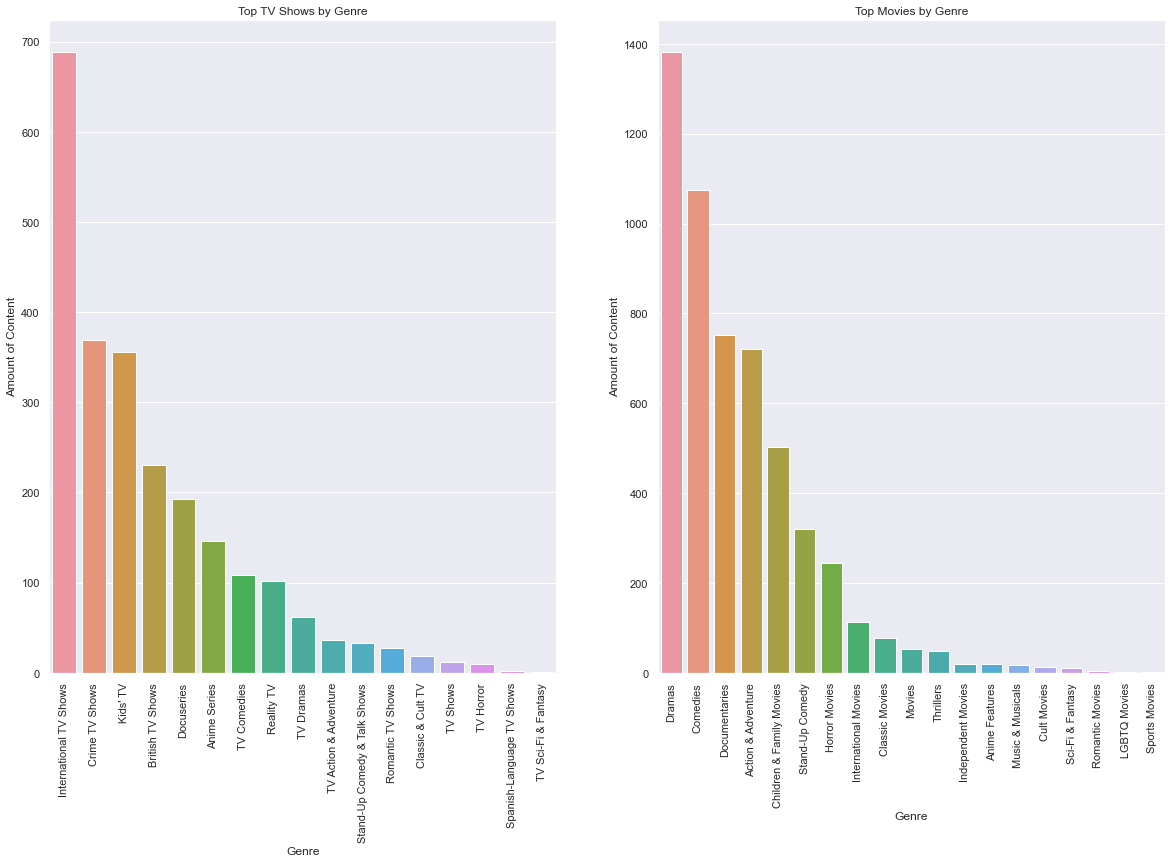

In [28]:
#Top Tv and Movies by genre
#seperating tv and movie data
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

tv_ratings = df_tv.groupby(['genre'])['country'].count().reset_index(name='count').sort_values(by='count',ascending=False)

f, axs = plt.subplots(1,2,
figsize=(20,12))

plt.sca(axs[0])
plt.xticks(rotation=90)

sns.barplot(data=tv_ratings,x="genre", y='count', ax=axs[0])
axs[0].set_title('Top TV Shows by Genre')
axs[0].set_ylabel('Amount of Content')
axs[0].set_xlabel('Genre')
plt.xticks(rotation=90)


movie_ratings = df_movies.groupby(['genre'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)


plt.sca(axs[1])
plt.xticks(rotation=90)
sns.barplot(data=movie_ratings,x="genre", y='count',ax=axs[1])
axs[1].set_title('Top Movies by Genre')
axs[1].set_ylabel('Amount of Content')
axs[1].set_xlabel('Genre')


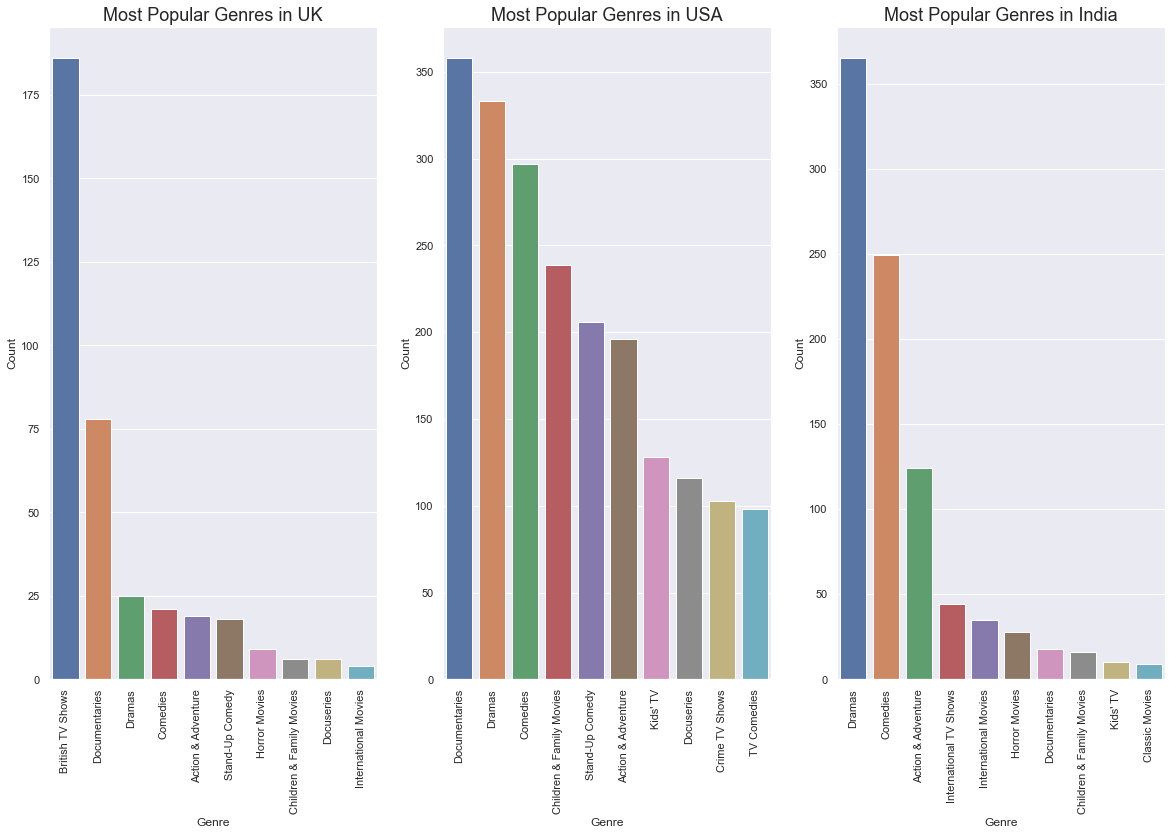

In [29]:
#Top 3 countries genre content


#Dataframe for each country
df_US = df[df["country"] == 'United States']
df_In = df[df["country"] == 'India']
df_UK = df[df["country"] == 'United Kingdom']




##
df_con = df_In.groupby(['genre'])['show_id'].count().reset_index(name="counter").sort_values(by="counter",ascending=False)
df_con2 = df_US.groupby(['genre'])['show_id'].count().reset_index(name="counter2").sort_values(by="counter2",ascending=False)
df_con3 = df_UK.groupby(['genre'])['show_id'].count().reset_index(name="counter3").sort_values(by="counter3",ascending=False)

#Use top 10 genres
#usa
df_top1 = df_con2[:10]
#'india'
df_top2 = df_con[:10]
#uk
df_top3 = df_con3[:10]

#India Genre Popularity


f, axs = plt.subplots(1,3,
figsize=(20,12))

#extract and group by ratings

plt.sca(axs[0])
plt.xticks(rotation=90)
sns.barplot(data=df_top3,x="genre", y="counter3",ax=axs[0])
#Titles and Labels
axs[0].set_title("Most Popular Genres in UK", fontsize=18)
axs[0].set_xlabel("Genre")
axs[0].set_ylabel("Count")


plt.sca(axs[1])
plt.xticks(rotation=90)
sns.barplot(data=df_top1,x="genre", y="counter2",ax=axs[1])
#Titles and Labels
axs[1].set_title("Most Popular Genres in USA", fontsize=18)
axs[1].set_xlabel("Genre")
axs[1].set_ylabel("Count")

plt.sca(axs[2])
plt.xticks(rotation=90)
sns.barplot(data=df_top2,x="genre", y="counter",ax=axs[2])
#Titles and Labels
axs[2].set_title("Most Popular Genres in India", fontsize=18)
axs[2].set_xlabel("Genre")
axs[2].set_ylabel("Count")

plt.show()



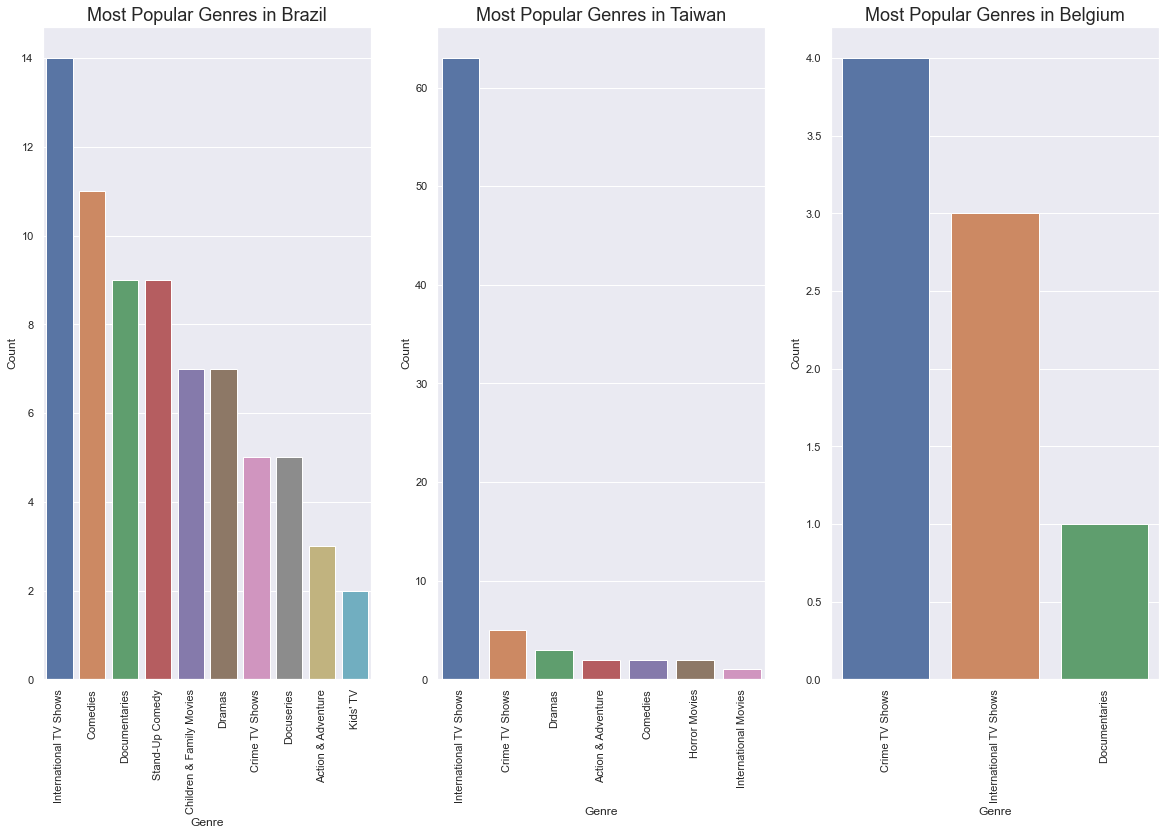

In [30]:
#Bottom 3 countries genre content


#Dataframe for each country
df_BZ = df[df["country"] == 'Brazil']
df_TA = df[df["country"] == 'Taiwan']
df_BG = df[df["country"] == 'Belgium']




##
df_con4 = df_BZ.groupby(['genre'])['show_id'].count().reset_index(name="counter4").sort_values(by="counter4",ascending=False)
df_con5 = df_TA.groupby(['genre'])['show_id'].count().reset_index(name="counter5").sort_values(by="counter5",ascending=False)
df_con6 = df_BG.groupby(['genre'])['show_id'].count().reset_index(name="counter6").sort_values(by="counter6",ascending=False)

#Use top 10 genres
#brazil
df_top4 = df_con4[:10]
#taiwan
df_top5 = df_con5[:10]
#belgium
df_top6 = df_con6[:10]

#India Genre Popularity


f, axs = plt.subplots(1,3,
figsize=(20,12))

#extract and group by ratings

plt.sca(axs[0])
plt.xticks(rotation=90)
sns.barplot(data=df_top4,x="genre", y="counter4",ax=axs[0])
#Titles and Labels
axs[0].set_title("Most Popular Genres in Brazil", fontsize=18)
axs[0].set_xlabel("Genre")
axs[0].set_ylabel("Count")


plt.sca(axs[1])
plt.xticks(rotation=90)
sns.barplot(data=df_top5,x="genre", y="counter5",ax=axs[1])
#Titles and Labels
axs[1].set_title("Most Popular Genres in Taiwan", fontsize=18)
axs[1].set_xlabel("Genre")
axs[1].set_ylabel("Count")

plt.sca(axs[2])
plt.xticks(rotation=90)
sns.barplot(data=df_top6,x="genre", y="counter6",ax=axs[2])
#Titles and Labels
axs[2].set_title("Most Popular Genres in Belgium", fontsize=18)
axs[2].set_xlabel("Genre")
axs[2].set_ylabel("Count")

plt.show()



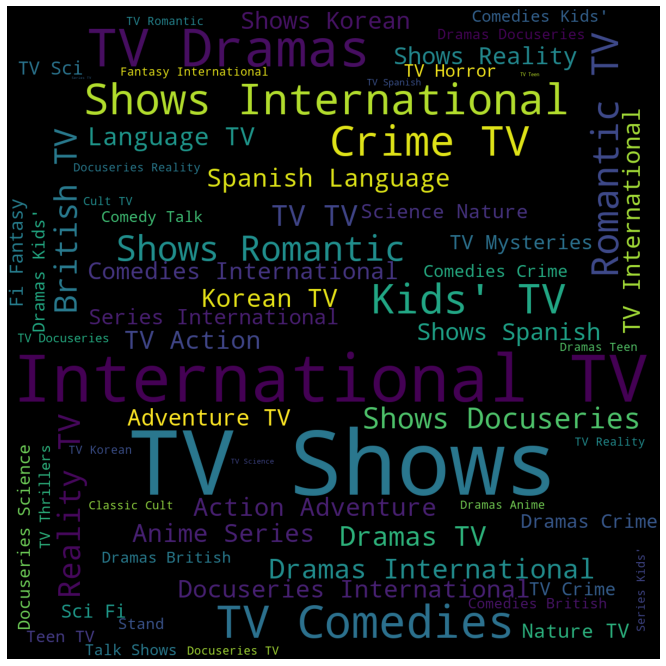

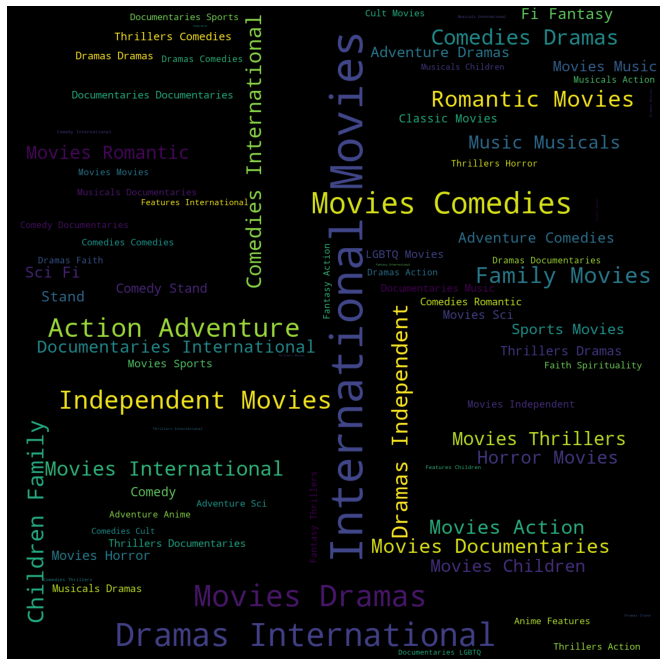

In [31]:
#Word cloud of most common tv genres

text = ' '.join(df_tv['listed_in'])

#tv
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#movies
text = ' '.join(df_movies['listed_in'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
#Ratings Analysis

Text(0, 0.5, 'Count')

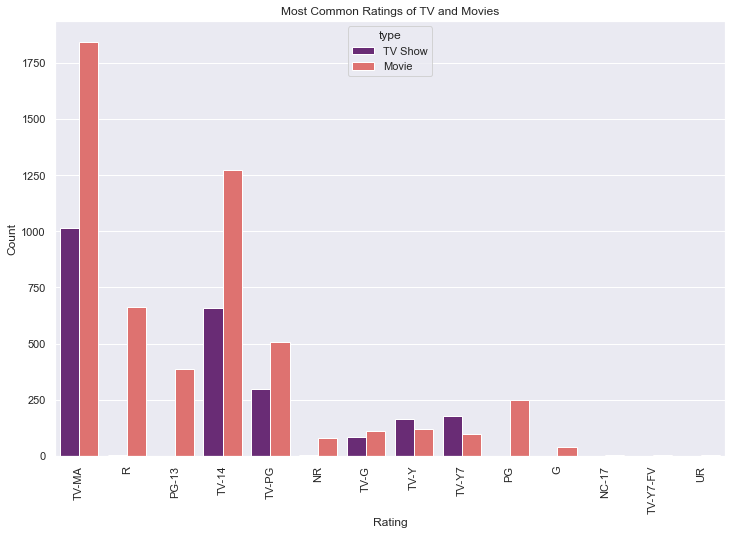

In [33]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)


rat = sns.countplot(x='rating', data=df, hue='type', palette="magma")

#Title and Labels
rat.set_title('Most Common Ratings of TV and Movies')
rat.set_xlabel('Rating')
rat.set_ylabel ('Count')




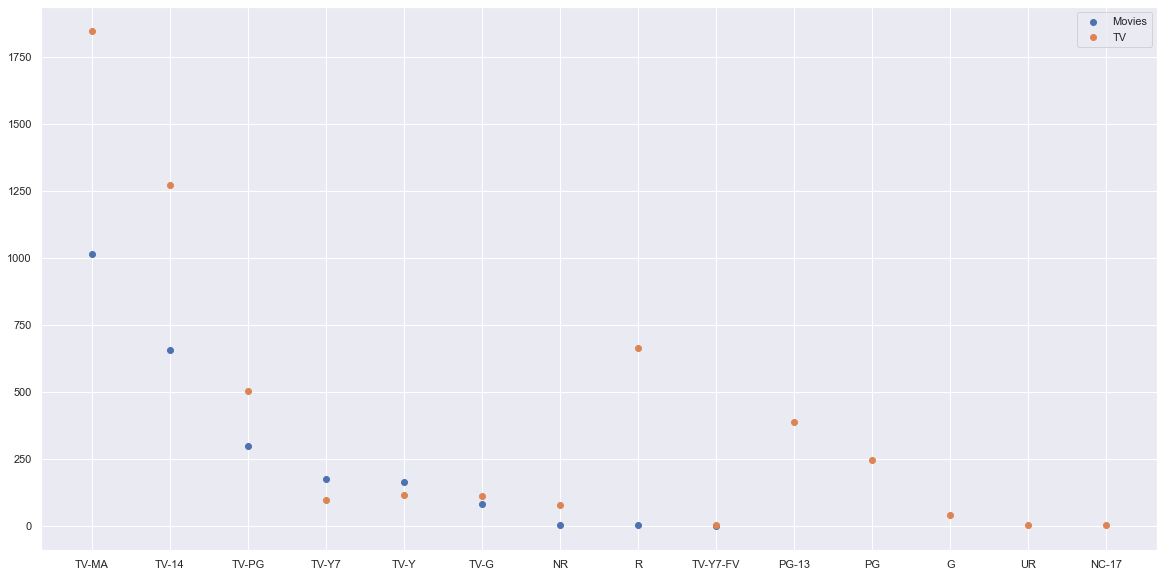

In [34]:
fig = plt.figure(figsize=(20,10))
#Plot 2 dataframes on 1 axis
ax1 = fig.add_subplot(111)

#Seperate and group tv and movie ratings
tv_ratings2 = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
movie_ratings2 = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

# make scatterplot using above data frames on same axis
ax1.scatter(data= tv_ratings2,x="rating", y="count")
ax1.scatter(data= movie_ratings2,x="rating",y="count")


#Change legend location and labels
plt.legend(loc='upper right')
plt.legend(['Movies', 'TV'])

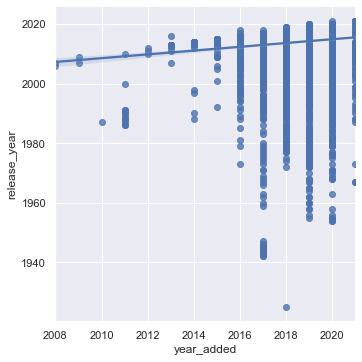

In [35]:
#linear regression for year added vs release year
sns.lmplot(x="year_added",y="release_year",data= df)

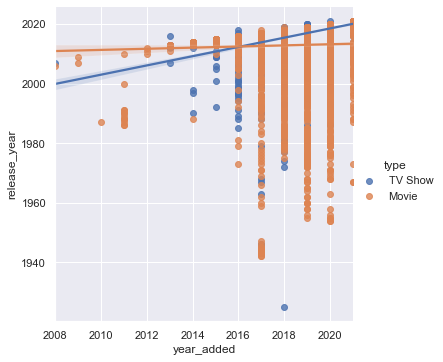

In [36]:
#linear regression for year added vs release year
sns.lmplot(x="year_added",y="release_year",hue="type",data= df)

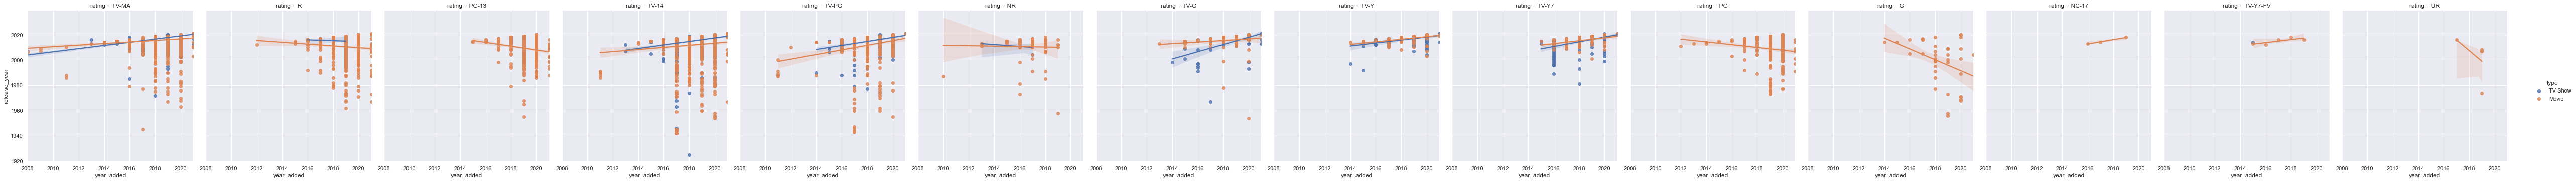

In [37]:
#Ratings change through release year and content added


sns.lmplot(x="year_added", y="release_year", hue="type",
           col="rating", data=df)

Text(0, 0.5, 'Country')

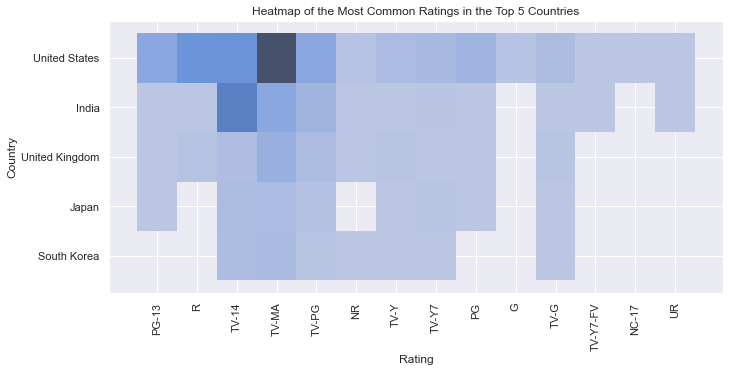

In [38]:
# Show content top 5 country wise ratings
plt.figure(figsize=(11,5))
plt.xticks(rotation=90)
top_countries = df[df.country.isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'])]
d = sns.histplot(x='rating', y='country', data=top_countries, palette='magma')

#Titles
d.set_title('Heatmap of the Most Common Ratings in the Top 5 Countries')
d.set_xlabel('Rating')
d.set_ylabel('Country')

#sns.countplot(x='country',hue='type',data=df[df.country.isin(['United States','India','United Kingdom','N/A','Canada','France','Japan','Spain','South Korea','German,''Mexico','China'])])


In [39]:
px.line(df.groupby(['type','rating', 'year_added']).count().reset_index(), x = 'year_added', y = 'show_id', color = 'rating', facet_col = 'type',  labels={
                     "year_added": "Year",
                     "show_id": "Frequency"
                     
                 },
                title="Rating Frequency by Content added to Netflix since 2010")



In [40]:
#Analysis of content duration,ratings and release

Text(0, 0.5, 'Release Year')

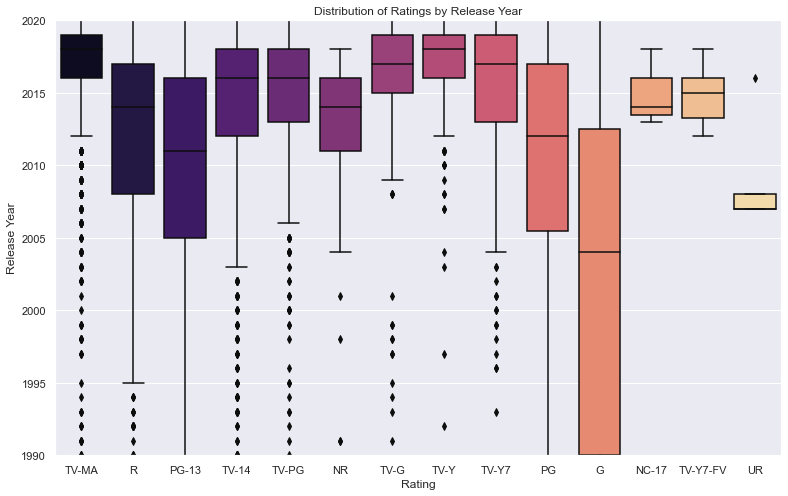

In [41]:
#Boxplot showing mean ratings of movies over time
plt.figure(figsize=(13,8))

#boxplot 
f = sns.boxplot(y='release_year', x='rating', data=df, palette='magma')

#year range
plt.ylim(1990,2020)

#titles
f.set_title('Distribution of Ratings by Release Year')
f.set_xlabel('Rating')
f.set_ylabel('Release Year')


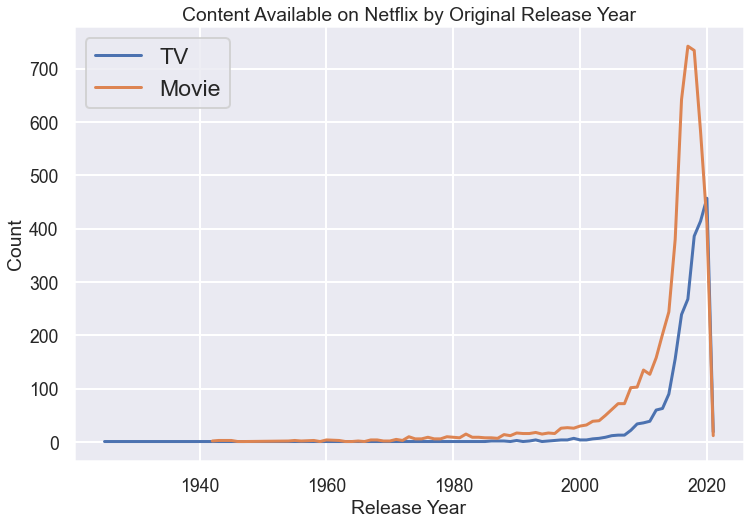

In [42]:
#Release year tracking

#Seperate TV & Movie by release year
df_tv2 = df[df['type']=='TV Show'].groupby('release_year').count()
df_movie2 = df[df['type']=='Movie'].groupby('release_year').count()

#Visualizing using matplotlib
plt.figure(figsize=(12,8))
sns.set_context("poster", font_scale = 0.8)
g = sns.lineplot(data=df_tv2['show_id'], sizes=10)
g = sns.lineplot(data=df_movie2['show_id'])


#title
g.set_title('Content Available on Netflix by Original Release Year')
g.set_xlabel('Release Year')
g.set_ylabel('Count')
#Legend
plt.legend(['TV', 'Movie'], fontsize='large')

plt.show()

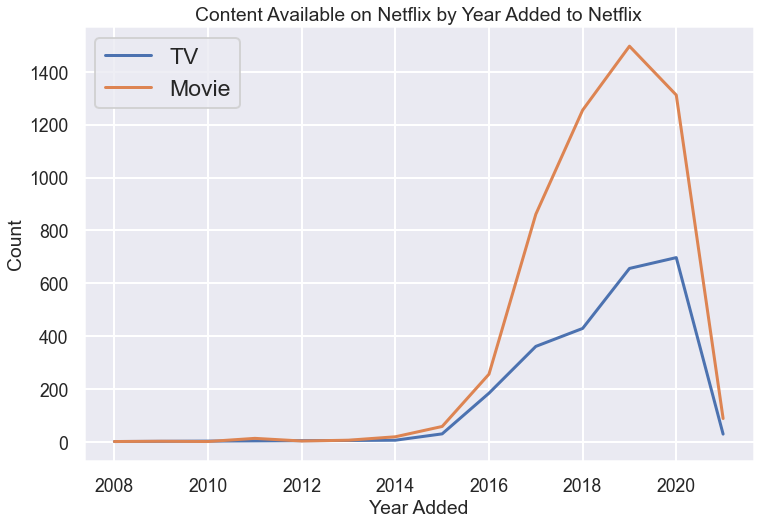

In [43]:
#Seperate TV & Movie by year ADDED TO NETFLIX
df_tv2 = df[df['type']=='TV Show'].groupby('year_added').count()
df_movie2 = df[df['type']=='Movie'].groupby('year_added').count()

#Visualising differences using matplotlib
plt.figure(figsize=(12,8))
sns.set_context("poster", font_scale = 0.8)
h = sns.lineplot(data=df_tv2['show_id'], sizes=10)
h = sns.lineplot(data=df_movie2['show_id'])

#title
h.set_title('Content Available on Netflix by Year Added to Netflix')
h.set_xlabel('Year Added')
h.set_ylabel('Count')

#Legend
plt.legend(['TV', 'Movie'], fontsize='large')

plt.show()

In [44]:
#Does release year effect duration of content?

#Extract Minutes from duration time
def to_minutes(series): #function to return only the first element
    return series.split()[0]
    
        
df['duration'] = df.duration.apply(lambda x: to_minutes(x))


#Check 'min' has been removed
df[df.type == 'Movie'].duration.head()





1     93
2     78
3     80
4    123
6     95
Name: duration, dtype: object

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



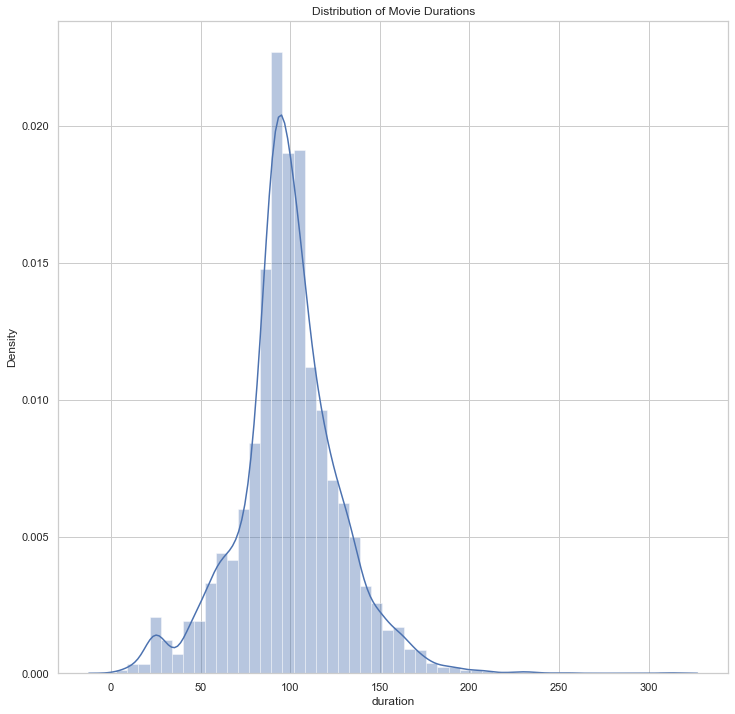

In [45]:

sns.set(style='whitegrid')
#Distribution of Movies by distribution
sns.distplot(df[df.type == 'Movie'].duration).set_title('Distribution of Movie Durations')
plt.show()

In [46]:


#Extract season count from duration time
def to_minutes(series): #return only the first element
    return series.split()[0]
    
df['duration'] = df.duration.apply(lambda x: to_minutes(x))


#Check 'seasons' have been removed
df[df.type == 'TV Show'].duration.head()



0     4
5     1
11    1
12    1
16    1
Name: duration, dtype: object

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



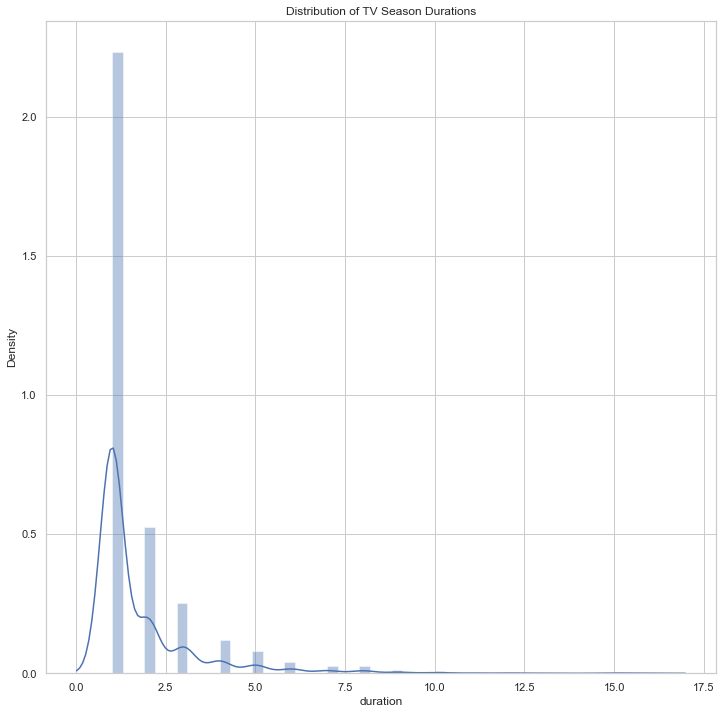

In [47]:
sns.set(style='whitegrid')

#Distribution of Movies by distribution
sns.distplot(df[df.type == 'TV Show'].duration).set_title('Distribution of TV Season Durations')
plt.show()

In [48]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

data_movie = df[df['type'] == 'Movie']
data_tv = df[df['type'] == 'TV Show']

# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=data_movie.duration,
    y=data_tv.duration,
    z=df.release_year,
    mode='markers',
    marker_color='green'
)

data2 = [trace1]
layout = go.Layout(
)
fig = go.Figure(data=data2, layout=layout)
fig.update_layout(title_text='Distribution of Duration across Movies and TV Show in the past years', title_x=0.5)
iplot(fig)

<ipython-input-72-6f8bf50d9cb1>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



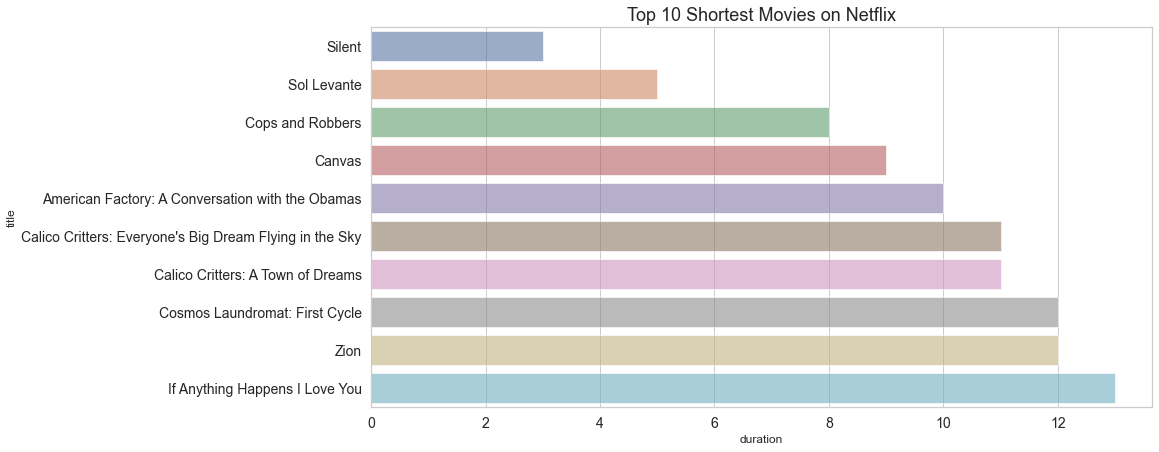

In [72]:
#Shortest Movies on Netflix


#extract and group by ratings


#Group and 
grp = df.groupby('type')
movie = grp.get_group('Movie')
movie['duration'] = [int(i.split(' ')[0]) for i in movie.duration.dropna()]
short = movie.sort_values('duration')[['title', 'duration']].iloc[:10]


#Barplot
plt.figure(figsize=(14,7))
plt.title('Top 10 Shortest Movies on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot( short['duration'],short['title'], alpha=0.6)

plt.show()




<ipython-input-50-07ee08110d96>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



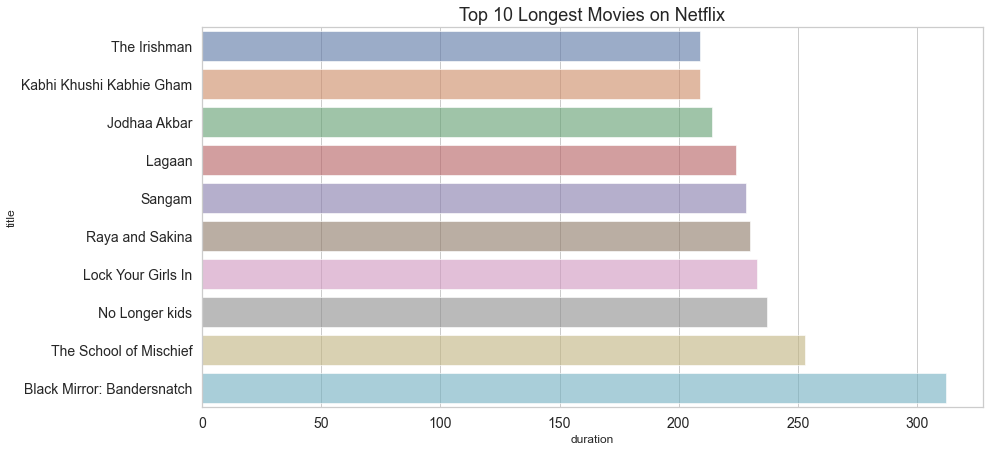

In [50]:
#Longest Movies on Netflix


#Group movie and type
grp = df.groupby('type')
movie = grp.get_group('Movie')
movie['duration'] = [int(i.split(' ')[0]) for i in movie.duration.dropna()]
long = movie.sort_values('duration')[['title', 'duration']].iloc[-10:]


#Barplot
plt.figure(figsize=(14,7))
plt.title('Top 10 Longest Movies on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot( long['duration'],long['title'], alpha=0.6)

plt.show()




<ipython-input-52-7c2afe7991d3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



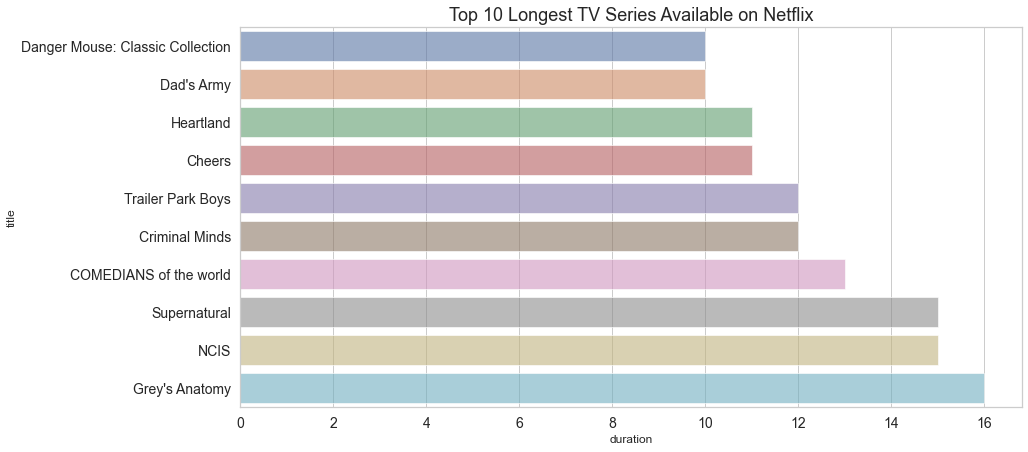

In [52]:
#Longest TV Shows on Netflix


#Group 
grp = df.groupby('type')
tv = grp.get_group('TV Show')
tv['duration'] = [int(i.split(' ')[0]) for i in tv.duration.dropna()]
long2 = tv.sort_values('duration')[['title', 'duration']].iloc[-10:]


#Barplot
plt.figure(figsize=(14,7))
plt.title('Top 10 Longest TV Series Available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot( long2['duration'],long2['title'], alpha=0.6)

plt.show()


<ipython-input-68-91c35e26d4cc>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



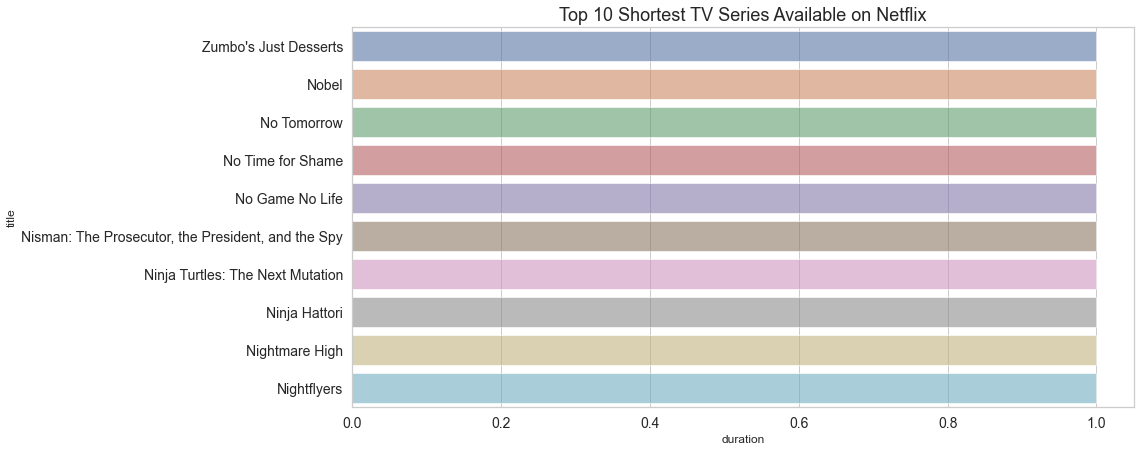

In [68]:
#Shortest TV Shows on Netflix
#Top 10

#Group 
grp = df.groupby('type')
tv = grp.get_group('TV Show')
tv['duration'] = [int(i.split(' ')[0]) for i in tv.duration.dropna()]
short2 = tv.sort_values('duration')[['title', 'duration']].iloc[:10]


#Barplot
plt.figure(figsize=(14,7))
plt.title('Top 10 Shortest TV Series Available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot( short2['duration'],short2['title'], alpha=0.6)

plt.show()



<ipython-input-55-8b37ccd96654>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



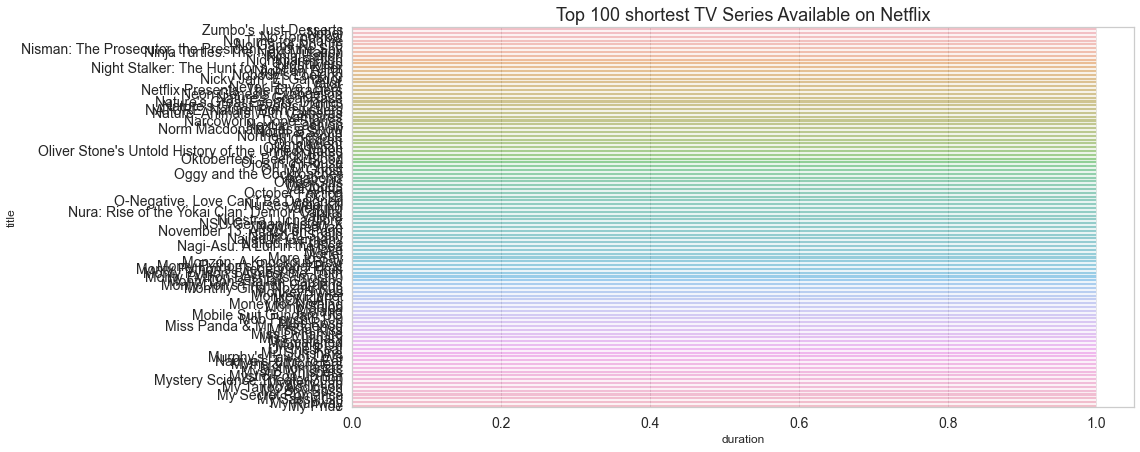

In [55]:
#Shortest TV Shows on Netflix
#DEMONSTRATING MOST ARE 1 SEASON

#Group 
grp = df.groupby('type')
tv = grp.get_group('TV Show')
tv['duration'] = [int(i.split(' ')[0]) for i in tv.duration.dropna()]
short3 = tv.sort_values('duration')[['title', 'duration']].iloc[:100]


#Barplot
plt.figure(figsize=(14,7))
plt.title('Top 100 shortest TV Series Available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)

sns.barplot( short3['duration'],short3['title'], alpha=0.6)

plt.show()

In [62]:
# most popular genre titles - TV
df_tvrslt = df_tv.loc[df_tv['genre'] == 'International TV Shows']

print('\nResult dataframe :\n', df_tvrslt)


Result dataframe :
      show_id     type                  title      country date_added  \
0         s1  TV Show                     3%       Brazil 2020-08-14   
5         s6  TV Show                     46       Turkey 2017-07-01   
16       s17  TV Show                 Feb-09          N/A 2019-03-20   
38       s39  TV Show    แผนร้ายนายเจ้าเล่ห์          N/A 2019-03-30   
51       s52  TV Show     100 Days My Prince  South Korea 2020-12-07   
...      ...      ...                    ...          ...        ...   
7752   s7753  TV Show          Yummy Mummies    Australia 2019-07-03   
7753   s7754  TV Show             Yunus Emre       Turkey 2017-01-17   
7767   s7768  TV Show     Zindagi Gulzar Hai     Pakistan 2016-12-15   
7779   s7780  TV Show              Zona Rosa       Mexico 2019-11-26   
7785   s7786  TV Show  Zumbo's Just Desserts    Australia 2020-10-31   

      release_year rating duration  \
0             2020  TV-MA        4   
5             2016  TV-MA        1   


In [64]:
# most popular genre titles - TV Crime
df_tvrslt2 = df_tv.loc[df_tv['genre'] == 'Crime TV Shows']

print('\nResult dataframe :\n', df_tvrslt2)


Result dataframe :
      show_id     type                               title  \
11       s12  TV Show                                1983   
12       s13  TV Show                                1994   
45       s46  TV Show                               Şubat   
63       s64  TV Show                      13 Reasons Why   
64       s65  TV Show  13 Reasons Why: Beyond the Reasons   
...      ...      ...                                 ...   
7672   s7673  TV Show                            Wormwood   
7698   s7699  TV Show                              Yankee   
7721   s7722  TV Show                                 You   
7725   s7726  TV Show                     You Cannot Hide   
7738   s7739  TV Show                     Young Wallander   

                    country date_added  release_year rating duration  \
11    Poland, United States 2018-11-30          2018  TV-MA        1   
12                   Mexico 2019-05-17          2019  TV-MA        1   
45                   Turkey 20

In [65]:
# most popular genre titles - Movies Dramas
df_mvrslt = df_movies.loc[df_movies['genre'] == 'Dramas']

print('\nResult dataframe :\n', df_mvrslt)


Result dataframe :
      show_id   type                     title  \
1         s2  Movie                      7:19   
4         s5  Movie                        21   
7         s8  Movie                       187   
10       s11  Movie                      1922   
15       s16  Movie                    Oct-01   
...      ...    ...                       ...   
7768   s7769  Movie  Zindagi Kitni Haseen Hay   
7770   s7771  Movie                   Zinzana   
7780   s7781  Movie                       Zoo   
7782   s7783  Movie                      Zozo   
7783   s7784  Movie                    Zubaan   

                                                country date_added  \
1                                                Mexico 2016-12-23   
4                                         United States 2020-01-01   
7                                         United States 2019-11-01   
10                                        United States 2017-10-20   
15                                      

In [66]:
# most popular genre titles - Movie Comedies
df_tvrslt = df_movies.loc[df_movies['genre'] == 'Comedies']

print('\nResult dataframe :\n', df_tvrslt)


Result dataframe :
      show_id   type                     title        country date_added  \
18       s19  Movie                    15-Aug          India 2019-03-29   
33       s34  Movie              #realityhigh  United States 2017-09-08   
34       s35  Movie                     #Roxy         Canada 2019-04-10   
36       s37  Movie                   #Selfie        Romania 2019-06-01   
37       s38  Movie                #Selfie 69        Romania 2019-06-01   
...      ...    ...                       ...            ...        ...   
7760   s7761  Movie                 Zaki Chan          Egypt 2020-05-19   
7762   s7763  Movie                  Zed Plus          India 2019-12-31   
7764   s7765  Movie                      Zero          India 2019-05-21   
7769   s7770  Movie  Zindagi Na Milegi Dobara          India 2019-12-15   
7778   s7779  Movie                Zombieland  United States 2019-11-01   

      release_year rating duration  \
18            2019  TV-14      124   
33